In [1]:
from helpers import *
import os
print(os.getcwd())

/home/workspace/2022.micro.artifact/experiments-matmul


In [3]:
verbose = True
architecture2 = "/home/workspace/2022.micro.artifact/experiments-matmul/arch3.yaml"
component = "/home/workspace/2022.micro.artifact/experiments-matmul/compound_components.yaml"
ERT_output_path = "ERT.yaml"
ART_output_path = "ART.yaml"
sparse_opts = "SI-SW.yaml"
workload = "/home/workspace/2022.micro.artifact/experiments-matmul/matmul.yaml"
mapper = "/home/workspace/2022.micro.artifact/experiments-matmul/mapper.yaml"
mapping = "/home/workspace/2022.micro.artifact/experiments-matmul/timeloop_temp/timeloop-mapper.map.yaml"
constraints = "/home/workspace/2022.micro.artifact/experiments-matmul/constraints.yaml"

In [4]:
# Run Accelergy with the provided arguments
result = run_accelergy(
    architecture_yaml=architecture2,
    component_yaml=component,
    ERT_output_path=ERT_output_path,
    ART_output_path=ART_output_path
)

print(f"Generated ERT file: {result['ERT']}")
print(f"Generated ART file: {result['ART']}")

Running Accelergy command: accelergy /home/workspace/2022.micro.artifact/experiments-matmul/arch3.yaml /home/workspace/2022.micro.artifact/experiments-matmul/compound_components.yaml -o accelergy_temp -v 1
    _                _                      
   / \   ___ ___ ___| | ___ _ __ __ _ _   _ 
  / _ \ / __/ __/ _ \ |/ _ \ '__/ _` | | | |
 / ___ \ (_| (_|  __/ |  __/ | | (_| | |_| |
/_/   \_\___\___\___|_|\___|_|  \__, |\__, |
                                |___/ |___/ 

Info: generating outputs according to the following specified output flags... 
 Please use the -f flag to update the preference (default to all output files) 
{'ERT': 1, 'ERT_summary': 1, 'ART': 1, 'ART_summary': 1, 'energy_estimation': 1, 'flattened_arch': 1}
Info: config file located: /home/workspace/.config/accelergy/accelergy_config.yaml 
config file content: 
 {'version': 0.3, 'compound_components': [], 'estimator_plug_ins': ['/usr/local/share/accelergy/estimation_plug_ins'], 'primitive_components': ['/usr/local/

In [31]:
# If you want mapper
# Run Timeloop mapper with the provided arguments
result = run_timeloop_mapper(
    architecture_yaml=architecture2,
    workload=workload,
    sparse_opts=sparse_opts,
    ERT=ERT_output_path,
    ART=ART_output_path,
    output_mapping_path="searched_mapping.yaml",
    mapper=mapper,
    constraints=constraints
)

mapping_path = result["best_mapping"]
print(mapping_path)

['timeloop-mapper', '/home/workspace/2022.micro.artifact/experiments-matmul/arch3.yaml', '/home/workspace/2022.micro.artifact/experiments-matmul/matmul.yaml', 'SI-SW.yaml', '/home/workspace/2022.micro.artifact/experiments-matmul/constraints.yaml', '/home/workspace/2022.micro.artifact/experiments-matmul/mapper.yaml', '--ERT', 'ERT.yaml', '--ART', 'ART.yaml', '-o', 'timeloop_temp']
  _______                __                
 /_  __(_)___ ___  ___  / /___  ____  ____ 
  / / / / __ `__ \/ _ \/ / __ \/ __ \/ __ \
 / / / / / / / / /  __/ / /_/ / /_/ / /_/ /
/_/ /_/_/ /_/ /_/\___/_/\____/\____/ .___/ 
                                  /_/      

Problem configuration complete.
Found Accelergy ERT (energy reference table), replacing internal energy model.
Found Accelergy ART (area reference table), replacing internal area model.
Architecture configuration complete.
Sparse optimization configuration complete.
Using threads = 4
Mapper configuration complete.
Initializing Index Factorization sub

[  3] Utilization = 0.31 | pJ/Algorithmic-Compute =    0.001 | pJ/Compute = 30624.819 | L4[] M8 N256 N8X - L3[I] M128 - L2[W] N2 - L1[O] N4 M2 - L0[] M8 
[  2] Utilization = 0.31 | pJ/Algorithmic-Compute =    0.001 | pJ/Compute = 30624.819 | L4[] M8 N256 N8X - L3[I] M128 - L2[W] N2 - L1[O] N4 - L0[] M16 
[  1] Utilization = 0.62 | pJ/Algorithmic-Compute =    0.000 | pJ/Compute = 5375.292 | L4[] M128 N512 N16X - L3[I] N2 - L2[W] M4 - L1[O] N1 - L0[] M32 
[  2] Utilization = 0.31 | pJ/Algorithmic-Compute =    0.001 | pJ/Compute = 23522.695 | L4[] M8 N256 N8X - L3[I] M128 - L2[W] N2 - L1[O] N4 - L0[I] M16 
[  3] Utilization = 0.31 | pJ/Algorithmic-Compute =    0.001 | pJ/Compute = 23522.695 | L4[] M8 N256 N8X - L3[I] M128 - L2[W] N2 - L1[O] N4 M2 - L0[I] M8 
[  1] Utilization = 0.62 | pJ/Algorithmic-Compute =    0.000 | pJ/Compute = 2184.616 | L4[] M128 N512 N16X - L3[I] N2 - L2[W] M4 - L1[O] N1 - L0[I] M32 
[  2] Utilization = 0.62 | pJ/Algorithmic-Compute =    0.000 | pJ/Compute = 5375.



Summary stats for best mapping found by mapper:
  Utilization = 0.12 | pJ/Algorithmic-Compute =    0.000 | pJ/Compute = 2155.201
searched_mapping.yaml


In [32]:
# If you already have mapping
output_path = run_timeloop(
    arch_yaml=architecture2,
    workload=workload,
    sparse_opts=sparse_opts,
    mapping=mapping_path,
    constraints=constraints,
    mapper=mapper,
    ert_path=ERT_output_path,
    art_path=ART_output_path,
    output_dir="timeloop_output_test_3"
)

Running Timeloop:
timeloop-model /home/workspace/2022.micro.artifact/experiments-matmul/arch3.yaml /home/workspace/2022.micro.artifact/experiments-matmul/matmul.yaml searched_mapping.yaml SI-SW.yaml --ERT ERT.yaml --ART ART.yaml -o timeloop_output_test_3
Timeloop completed successfully.


MAC
{'energy': 888.6777199999999, 'utilization': 0.125}
reg
{'energy': 3539.808, 'storage_access_energy': 3539.808, 'read_energy': 3538.9439999999995, 'temporal_add_energy': 0.0, 'spatial_add_energy': 0.0, 'address_generation_energy': 0.0, 'network_energy': 0.0, 'energy_per_access_per_instance': array([  nan, 0.072,   nan]), 'actual_reads_per_instance': array([        0, 134217728,         0]), 'actual_updates_per_instance': array([0, 0, 0]), 'actual_fills_per_instance': array([    0, 32768,     0]), 'actual_accesses_per_instance': array([        0, 134250496,         0]), 'instances': array([2.00000000e+00, 3.66210938e-04, 2.00000000e+00]), 'utilization': 2.288818359375e-05, 'multicast': array([1, 1, 1]), 'dist_multicast': array([0, 0, 0]), 'num_hops': array([0.5, 0.5, 0.5]), 'ingresses': 0, 'energy_per_hop_per_instance': array([0., 0., 0.])}
psum_spad
{'energy': 5379.92404, 'storage_access_energy': 5379.92404, 'read_energy': 2391.077351111111, 'temporal_add_energy': 0.0, 'spatial_add

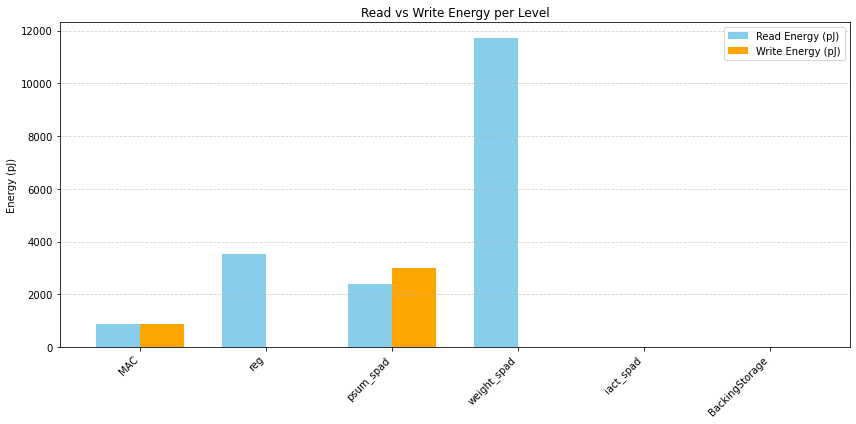

In [33]:
# Plot output
output = parse_timeloop_stats("timeloop_output_test_3/timeloop-model.map+stats.xml")
plot_read_write_energy(output["energy_breakdown_pJ"])

In [ ]:
# # Run Accelergy with the provided arguments
# result = run_accelergy(
#     architecture_yaml=architecture2,
#     component_yaml=component,
#     ERT_output_path=ERT_output_path,
#     ART_output_path=ART_output_path
# )

# print(f"Generated ERT file: {result['ERT']}")
# print(f"Generated ART file: {result['ART']}")

In [ ]:
# # If you want mapper
# # Run Timeloop mapper with the provided arguments
# result = run_timeloop_mapper(
#     architecture_yaml=architecture2,
#     workload=workload,
#     sparse_opts=sparse_opts,
#     ERT=ERT_output_path,
#     ART=ART_output_path,
#     output_mapping_path="searched_mapping.yaml",
#     mapper=mapper,
#     constraints=constraints
# )

# mapping_path = result["best_mapping"]

In [ ]:
# # If you already have mapping
# output_path = run_timeloop(
#     arch_yaml=architecture2,
#     workload=workload,
#     sparse_opts=sparse_opts,
#     mapping=mapping_path,
#     constraints=constraints,
#     mapper=mapper,
#     ert_path=ERT_output_path,
#     art_path=ART_output_path,
#     output_dir="timeloop_output_test_3"
# )

In [ ]:
# # Plot output
# output = parse_timeloop_stats("timeloop_output_test_3/timeloop-model.map+stats.xml")
# plot_read_write_energy(output["energy_breakdown_pJ"])